In [36]:


from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions

spark = SparkSession.builder.master("local").appName("Neural Network Model").config("spark.executor.memory", "6gb").getOrCreate()

sc = spark.sparkContext


In [53]:

data_set = spark.read.format("csv").option("header", "true").load("/home/ameadows/Downloads/HeightAndWeight.txt")
data_set = data_set.withColumn('Height', data_set['Height'].cast(IntegerType))
data_set = data_set.withColumn('Weight', data_set['Weight'].cast(IntegerType()))
data_set.show()


NameError: name 'Inte' is not defined

In [54]:
data_set = data_set.withColumn('Gender', functions.when(data_set['Gender'] == 'Female', 0).otherwise(1))
data_set.show()


+------+------+------+
|Gender|Height|Weight|
+------+------+------+
|     0|    67|   150|
|     0|    65|   135|
|     0|    68|   130|
|     1|    70|   160|
|     0|    70|   130|
|     1|    69|   174|
|     1|    65|   126|
|     1|    74|   188|
|     0|    60|   110|
|     0|    63|   125|
|     1|    70|   173|
|     0|    70|   145|
|     1|    68|   175|
|     0|    65|   123|
|     1|    71|   145|
|     1|    74|   160|
|     0|    64|   135|
|     1|    71|   175|
|     1|    67|   145|
|     1|    67|   130|
+------+------+------+
only showing top 20 rows



In [55]:
data_set = data_set.select('Height', 'Weight', "Gender")
data_set.show()



+------+------+------+
|Height|Weight|Gender|
+------+------+------+
|    67|   150|     0|
|    65|   135|     0|
|    68|   130|     0|
|    70|   160|     1|
|    70|   130|     0|
|    69|   174|     1|
|    65|   126|     1|
|    74|   188|     1|
|    60|   110|     0|
|    63|   125|     0|
|    70|   173|     1|
|    70|   145|     0|
|    68|   175|     1|
|    65|   123|     0|
|    71|   145|     1|
|    74|   160|     1|
|    64|   135|     0|
|    71|   175|     1|
|    67|   145|     1|
|    67|   130|     1|
+------+------+------+
only showing top 20 rows



In [56]:
import numpy as np

data_array = np.array(data_set.select("Height", "Weight", "Gender").collect()).astype(np.int)
data_array[0]
data_array[28]


array([ 64, 109,   0])

In [57]:
print(data_array.min(axis=0))
print(data_array.max(axis=0))


[ 60 107   0]
[ 74 188   1]


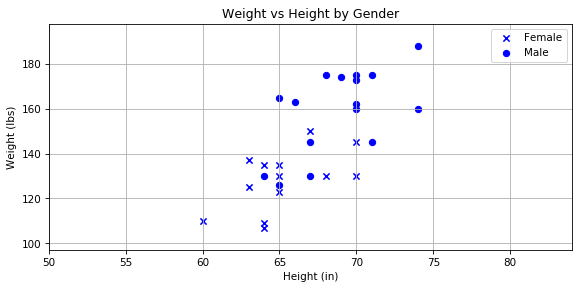

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10

min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9,4), dpi=75)
plt.axis([min_x, max_x, min_y, max_y])
plt.grid()
for i in range(len(data_array)):
    value = data_array[i]
    # assign label values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]
    
    # filter data points by gender
    a = plt.scatter(height[gender == 0], weight[gender == 0], marker = 'x', c= 'b', label = 'Female')
    b = plt.scatter(height[gender == 1], weight[gender == 1], marker= 'o', c= 'b', label = 'Male')
    
plt.title('Weight vs Height by Gender')
plt.xlabel('Height (in)')
plt.ylabel('Weight (lbs)')
plt.legend(handles = [a,b])
